In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df['Id'].nunique(), df.shape[0]

(2051, 2051)

In [4]:
np.sqrt(1000000)

1000.0

In [5]:
# for col in house.keys():
#     dtype = str(house[col].dtype)
#     nulls = str(house[col].isna().sum())
#     nunique = str(house[col].nunique())
#     unique = 0
#     if house[col].nunique() < 100:
#         unique = house[col].unique()
#     else:
#         unique = 'Continuous'
#     print('|**{}**|{}|{}|{}|{}| |'.format(col, dtype, nulls, nunique, unique))

In [6]:
df_info = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                        'dtype': [df[col].dtype for col in df.keys()], 
                        'nunique_values': [df[col].nunique() for col in df.keys()], 
                        'unique_values': [df[col].unique() if df[col].nunique() < 2051 \
                                          else 'Continuous' for col in df.keys()], 
                        'value_counts': [df[col].value_counts() if df[col].nunique() < 2051 \
                                         else 'Continuous' for col in df.keys()]}, 
                        index=[col for col in df.keys()])

In [7]:
# house['Alley'].isna().index
# house[house['Mas Vnr Type'].isna()]

### Data Cleanup
Columns to Drop
- [ ] ```Id```, 

Columns ready to convert astype(category)
- 

Columns to 

Nominal, Ordinal, Discrete, Continuous 

Total Missing Values Count: 

In [8]:
df.isna().sum().sum()

9822

Continuous


In [9]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


 |column|dtype|nulls|nunique|unique|vtype||
|:--|:-:|:-:|:--|:--|---|--:|
|**Id**|int64|0|2051|Continuous|Continuous|
|**PID**|int64|0|2051|Continuous|Continuous|
|**MS SubClass**|int64|0|16|[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]|Nominal|
|**MS Zoning**|object|0|7|['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']|Nominal|
|**Lot Frontage**|float64|330|118|Continuous|Continuous|
|**Lot Area**|int64|0|1476|Continuous|Continuous|
|**Street**|object|0|2|['Pave' 'Grvl']|Nominal|
|**Alley**|object|1911|2|[nan 'Pave' 'Grvl']|Nominal|
|**Lot Shape**|object|0|4|['IR1' 'Reg' 'IR2' 'IR3']|Nominal|
|**Land Contour**|object|0|4|['Lvl' 'HLS' 'Bnk' 'Low']|Nominal|
|**Utilities**|object|0|3|['AllPub' 'NoSeWa' 'NoSewr']|Nominal|
|**Lot Config**|object|0|5|['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']|Nominal|
|**Land Slope**|object|0|3|['Gtl' 'Sev' 'Mod']|Nominal|
|**Neighborhood**|object|0|28|['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale', 'CollgCr', 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor', 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr', 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']|Nominal|
|**Condition 1**|object|0|9|['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']|Nominal|
|**Condition 2**|object|0|8|['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']|Nominal|
|**Bldg Type**|object|0|5|['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']|Nominal|
|**House Style**|object|0|8|['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']|Nominal|
|**Overall Qual**|int64|0|10|[ 6  7  5  8 10  4  9  3  2  1]|Ordinal|
|**Overall Cond**|int64|0|9|[8 5 7 6 3 9 2 4 1]|Ordinal|
|**Year Built**|int64|0|113|Continuous|Continuous|
|**Year Remod/Add**|int64|0|61|[2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989 1991 1986 1982 1983 1974]|Continuous|
|**Roof Style**|object|0|6|['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']|Nominal|
|**Roof Matl**|object|0|6|['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']|Nominal|
|**Exterior 1st**|object|0|15|['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng' 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc' 'AsphShn']|Nominal|
|**Exterior 2nd**|object|0|15|['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd' 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock' 'AsphShn']|Nominal|
|**Mas Vnr Type**|object|22|4|['BrkFace' 'None' nan 'Stone' 'BrkCmn']|Nominal|
|**Mas Vnr Area**|float64|22|373|Continuous|Continuous|
|**Exter Qual**|object|0|4|['Gd' 'TA' 'Ex' 'Fa']|Ordinal|
|**Exter Cond**|object|0|5|['TA' 'Gd' 'Fa' 'Ex' 'Po']|Ordinal|
|**Foundation**|object|0|6|['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']|Nominal|
|**Bsmt Qual**|object|55|5|['TA' 'Gd' 'Fa' nan 'Ex' 'Po']|Ordinal|
|**Bsmt Cond**|object|55|5|['TA' 'Gd' nan 'Fa' 'Po' 'Ex']|Ordinal|
|**Bsmt Exposure**|object|58|4|['No' 'Gd' 'Av' nan 'Mn']|Ordinal|
|**BsmtFin Type 1 **|object|55|6|['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']|Nominal|
|**BsmtFin SF 1**|float64|1|821|Continuous|Continuous|
|**BsmtFin Type 2**|object|56|6|['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']|Nominal|
|**BsmtFin SF 2**|float64|1|205|Continuous|Continuous|
|**Bsmt Unf SF**|float64|1|967|Continuous|Continuous|
|**Total Bsmt SF**|float64|1|892|Continuous|Continuous|
|**Heating**|object|0|5|['GasA' 'GasW' 'Grav' 'Wall' 'OthW']|Nominal|
|**Heating QC**|object|0|5|['Ex' 'TA' 'Gd' 'Fa' 'Po']|Ordinal|
|**Central Air**|object|0|2|['Y' 'N']|Nominal|
|**Electrical**|object|0|5|['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']|Nominal|
|**1st Flr SF**|int64|0|915|Continuous|Continuous|
|**2nd Flr SF**|int64|0|504|Continuous|Continuous|
|**Low Qual Fin SF**|int64|0|31|[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234  390  697  114  512  144  514  397  140  479  259  436  156  384  360   53  362  450]|Ordinal|
|**Gr Liv Area**|int64|0|1053|Continuous|Continuous|
|**Bsmt Full Bath**|float64|2|4|[ 0.  1.  2. nan  3.]|Discrete|
|**Bsmt Half Bath**|float64|2|3|[ 0.  1. nan  2.]|Discrete|
|**Full Bath**|int64|0|5|[2 1 3 0 4]|Discrete|
|**Half Bath**|int64|0|3|[1 0 2]|Discrete|
|**Bedroom AbvGr**|int64|0|8|[3 4 2 5 1 0 6 8]|Discrete|
|**Kitchen AbvGr**|int64|0|4|[1 2 0 3]|Discrete|
|**Kitchen Qual**|object|0|4|['Gd' 'TA' 'Fa' 'Ex']|Ordinal|
|**TotRms AbvGrd**|int64|0|14|[ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]|Discrete|
|**Functional**|object|0|8|['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']|Nominal|
|**Fireplaces**|int64|0|5|[0 1 2 4 3]|Discrete|
|**Fireplace Qu**|object|1000|5|[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']|Ordinal|
|**Garage Type**|object|113|6|['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']|Nominal|
|**Garage Yr Blt**|float64|114|100|Continuous|Continuous|
|**Garage Finish**|object|114|3|['RFn' 'Unf' 'Fin' nan]|Nominal|
|**Garage Cars**|float64|1|6|[ 2.  1.  3.  0.  4.  5. nan]|Discrete|
|**Garage Area**|float64|1|514|Continuous|Continuous|
|**Garage Qual**|object|114|5|['TA' 'Fa' nan 'Gd' 'Ex' 'Po']|Ordinal|
|**Garage Cond**|object|114|5|['TA' 'Fa' nan 'Po' 'Gd' 'Ex']|Ordinal|
|**Paved Drive**|object|0|3|['Y' 'N' 'P']|Discrete|
|**Wood Deck SF**|int64|0|322|Continuous|Continuous|
|**Open Porch SF**|int64|0|223|Continuous|Continuous|
|**Enclosed Porch**|int64|0|159|Continuous|Continuous|
|**3Ssn Porch**|int64|0|22|[  0 176 224 162 168 120 407 144 150 255 508 180 140  96 323 153  86 216  245 182 290  304]|Discrete|
|**Screen Porch**|int64|0|100|Continuous|Continuous|
|**Pool Area**|int64|0|10|[  0 519 576 800 228 480 648 738 368 561]|Discrete|
|**Pool QC**|object|2042|4|[nan 'Fa' 'Gd' 'Ex' 'TA']|Ordinal|
|**Fence**|object|1651|4|[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']|Nominal|
|**Misc Feature**|object|1986|5|[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']|Nominal|
|**Misc Val**|int64|0|28|[    0   400   500  2000   650   600  1200   480   700   450  3000 12500  4500   460  3500  8300   455   300  1150   900    54  6500   800  1500  2500  1300 17000    80]|Discrete|
|**Mo Sold**|int64|0|12|[ 3  4  1  6  5  9  7  2 12 10 11  8]|Ordinal|
|**Yr Sold**|int64|0|5|[2010 2009 2006 2007 2008]|Ordinal|
|**Sale Type**|object|0|9|['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']|Nominal|
|**SalePrice**|int64|0|828|Continuous|Cintinuous|

In [10]:
df_info.iloc[:5]

,nulls,dtype,nunique_values,unique_values,value_counts
Id,0,int64,2051,Continuous,Continuous
PID,0,int64,2051,Continuous,Continuous
MS SubClass,0,int64,16,"[60, 20, 50, 180, 160, 70, 120, 190, 85, 30, 9...",20 770 60 394 50 198 120 132 30...
MS Zoning,0,object,7,"[RL, RM, FV, C (all), A (agr), RH, I (all)]",RL 1598 RM 316 FV 10...
Lot Frontage,330,float64,118,"[nan, 43.0, 68.0, 73.0, 82.0, 137.0, 35.0, 70....",60.0 179 70.0 96 80.0 94 50.0 ...


Dropping `Id`. 

<font color=red>Do I need PID?</font>

In [11]:
df.drop('Id', axis=1, inplace=True)

# EDA

---

In [107]:
df_info = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                        'dtype': [df[col].dtype for col in df.keys()], 
                        'nunique_values': [df[col].nunique() for col in df.keys()], 
                        'unique_values': [df[col].unique()for col in df.keys()], 
                        'value_counts': [df[col].value_counts() for col in df.keys()]}, 
                        index=[col for col in df.keys()])

def col_info(col, vtype):
    return pd.DataFrame({'type': vtype,
                         'nulls': df[col].isna().sum(), 
                         'dtype': df[col].dtype,
                         'nunique': df[col].nunique(), 
                         'unique_values': [df[col].unique()], 
                         'value_counts': [df[col].value_counts()]}, 
                         index=[col])

In [13]:
def plot_nominal_feature(feature):    
    fix, ax = plt.subplots(3, 1, figsize=(16, 20))

    ax[0].bar(x = [str(num) for num in sorted(df[feature].unique())], 
              height = df[feature].value_counts(normalize=True).sort_index())
    ax[0].set_ylabel('Freq of ' + feature, fontsize=13)
    ax[0].set_title('Frequency of Each ' + feature, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')
    
    ax[1].bar(x = [str(num) for num in sorted(df[feature].unique())], 
              height = df.groupby([feature])['SalePrice'].mean())
    ax[1].set_ylabel('Avg Sale Price', fontsize=13)
    ax[1].set_title('Average Sale Price for ' + feature, 
                    fontsize=13, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')

    df.boxplot(column=['SalePrice'], by=feature, ax=ax[2])
    ax[2].set_ylabel('Sale Price', fontsize=13)
    ax[2].set_title('Sale Price for each ' + feature, 
                    fontsize=13, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left');

## Nominal Data
1. MS SubClass
2. MS Zoning
3. Street
4. Alley
5. Land Contour
6. Lot Config
7. Neighborhood
9. Condition 1
10. Condition 2
11. **Bldg Type**
12. **House Style**
13. Roof Style 
14. Roof Matl
15. Exterior 1
16. Exterior 2
17. Mas Vnr Type
18. Foundation 
19. Heating
20. Central Air 
21. Garage Type 
22. Misc Feature 
23. Sale Type 
24. Sale Condition 

#### MS SubClass
- several groups have coutns less than 100, --> absorbed into other groups 

In [14]:
col_info('MS SubClass', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
MS SubClass,Nominal,0,int64,16,"[60, 20, 50, 180, 160, 70, 120, 190, 85, 30, 9...",20 770 60 394 50 198 120 132 30...


       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
       050	1-1/2 STORY FINISHED ALL AGES
       060	2-STORY 1946 & NEWER
       070	2-STORY 1945 & OLDER
       075	2-1/2 STORY ALL AGES
       080	SPLIT OR MULTI-LEVEL
       085	SPLIT FOYER
       090	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

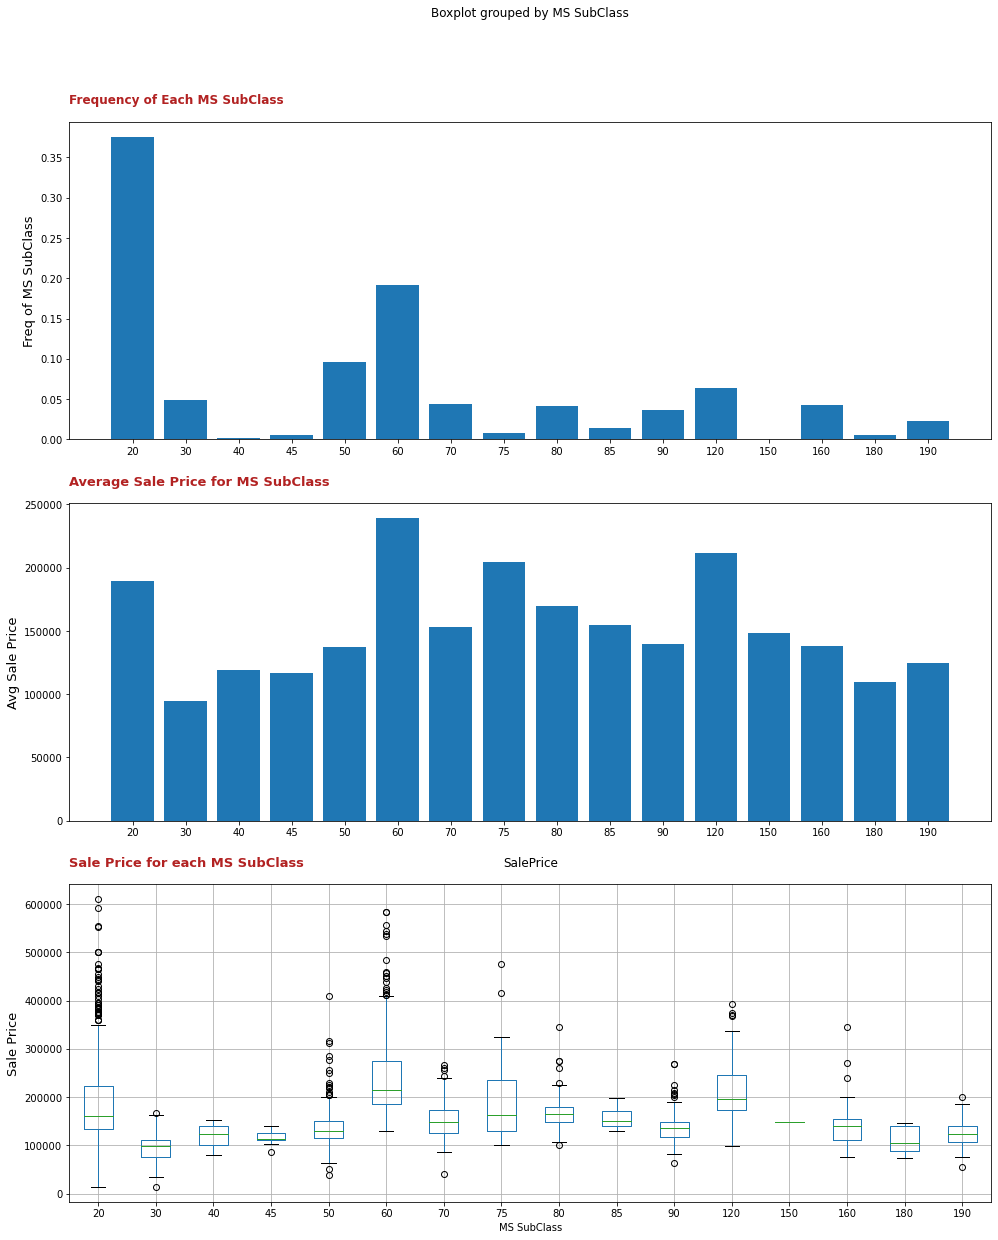

In [108]:
plot_nominal_feature('MS SubClass')

#### MS Zoning
- several groups have coutns less than 100, --> absorbed into other groups 

In [16]:
col_info('MS Zoning', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
MS Zoning,Nominal,0,object,7,"[RL, RM, FV, C (all), A (agr), RH, I (all)]",RL 1598 RM 316 FV 10...


Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

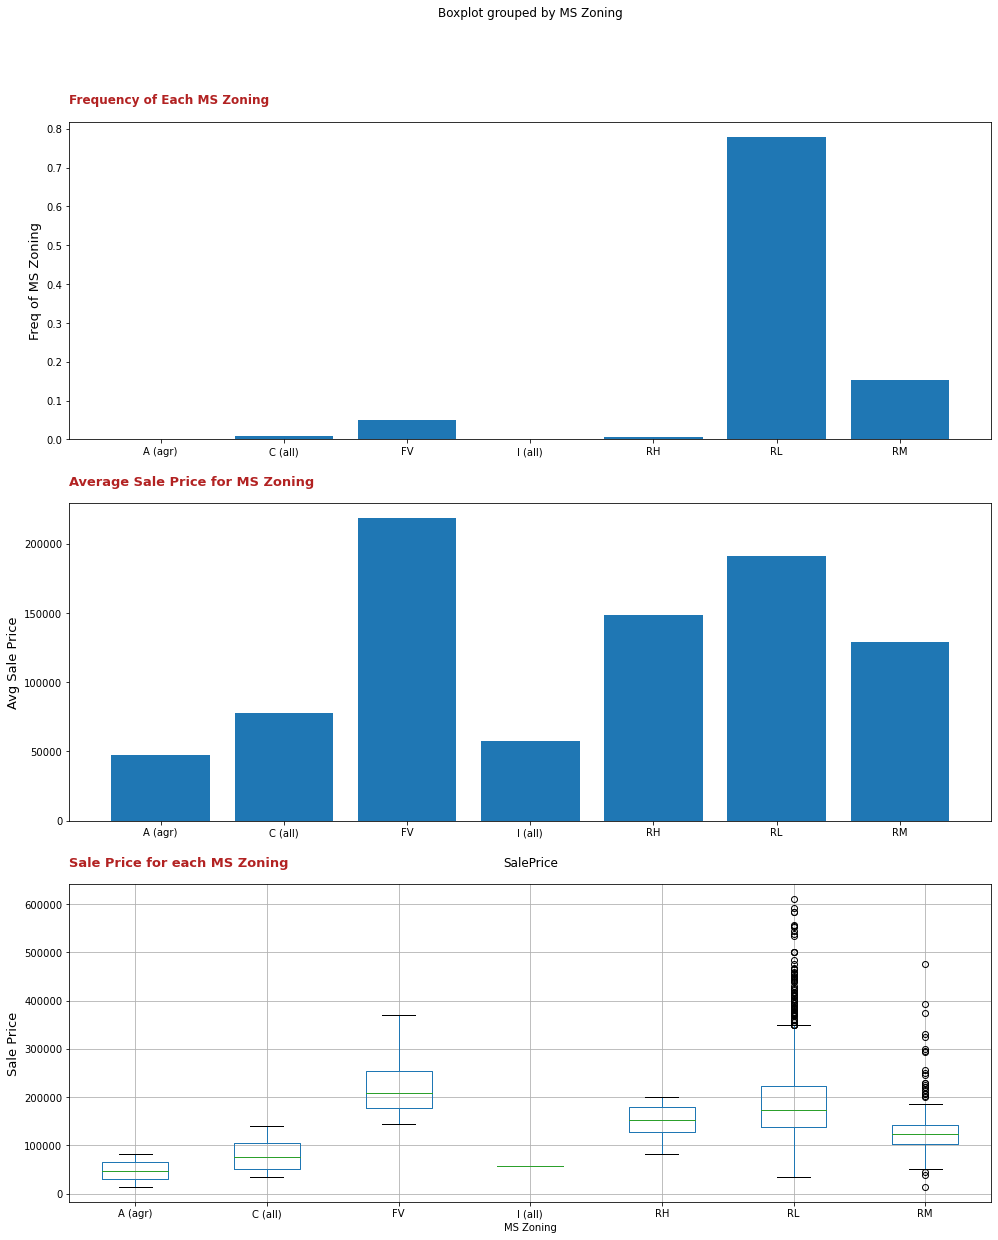

In [109]:
plot_nominal_feature('MS Zoning')

#### Street

In [18]:
col_info('Street', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Street,Nominal,0,object,2,"[Pave, Grvl]","Pave 2044 Grvl 7 Name: Street, dtype:..."


Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [19]:
# plot_nominal_feature('Street')

#### Alley

Cleanup
- [x] `Alley` replacing Nulls with 'NA'

In [20]:
df.loc[df['Alley'].isna(), 'Alley'] = 'CA'

In [21]:
col_info('Alley', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Alley,Nominal,0,object,3,"[CA, Pave, Grvl]",CA 1911 Grvl 85 Pave 55 Name: A...


Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [22]:
# plot_nominal_feature('Alley')

#### Land Contour

In [23]:
col_info('Land Contour', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Land Contour,Nominal,0,object,4,"[Lvl, HLS, Bnk, Low]",Lvl 1843 HLS 85 Bnk 80 Low 4...


Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [24]:
# plot_nominal_feature('Land Contour')

#### Lot Config

In [25]:
col_info('Lot Config', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Lot Config,Nominal,0,object,5,"[CulDSac, Inside, Corner, FR2, FR3]",Inside 1503 Corner 348 CulDSac 13...


Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [26]:
# plot_nominal_feature('Lot Config')

#### Neighborhood

In [27]:
col_info('Neighborhood', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Neighborhood,Nominal,0,object,28,"[Sawyer, SawyerW, NAmes, Timber, Edwards, OldT...",NAmes 310 CollgCr 180 OldTown 163 E...


Physical locations within Ames city limits (map available)

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [28]:
# plot_nominal_feature('Neighborhood')

#### Condition 1
Proximity to various conditions

In [29]:
col_info('Condition 1', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Condition 1,Nominal,0,object,9,"[RRAe, Norm, PosA, Artery, Feedr, PosN, RRAn, ...",Norm 1767 Feedr 109 Artery 70 R...


       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [30]:
# plot_nominal_feature('Condition 1')

#### Condition 2 
Proximity to various conditions (if more than one is present)

In [31]:
col_info('Condition 2', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Condition 2,Nominal,0,object,8,"[Norm, RRNn, Feedr, Artery, PosA, PosN, RRAe, ...",Norm 2025 Feedr 11 Artery 5 P...


       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [32]:
# plot_nominal_feature('Condition 2')

#### Bldg Type
Type of dwelling

In [33]:
col_info('Bldg Type', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Bldg Type,Nominal,0,object,5,"[1Fam, TwnhsE, Twnhs, 2fmCon, Duplex]",1Fam 1700 TwnhsE 161 Duplex 75 T...


       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [34]:
# plot_nominal_feature('Bldg Type')

#### House Style
Style of dwelling

In [35]:
col_info('House Style', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
House Style,Nominal,0,object,8,"[2Story, 1Story, 1.5Fin, SFoyer, SLvl, 2.5Unf,...",1Story 1059 2Story 598 1.5Fin 218 S...


       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [36]:
# plot_nominal_feature('House Style')

#### Roof Style 
Type of roof

In [37]:
col_info('Roof Style', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Roof Style,Nominal,0,object,6,"[Gable, Hip, Flat, Mansard, Shed, Gambrel]",Gable 1619 Hip 397 Flat 1...


       Flat	   Flat
       Gable	  Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed	   Shed

In [38]:
# plot_nominal_feature('Roof Style')

#### Roof Matl
Roof material

In [39]:
col_info('Roof Matl', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Roof Matl,Nominal,0,object,6,"[CompShg, WdShngl, Tar&Grv, WdShake, Membran, ...",CompShg 2025 Tar&Grv 15 WdShngl ...


       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [40]:
# plot_nominal_feature('Roof Matl')

#### Exterior 1st
Exterior covering on house

In [41]:
col_info('Exterior 1st', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Exterior 1st,Nominal,0,object,15,"[HdBoard, VinylSd, Wd Sdng, BrkFace, Plywood, ...",VinylSd 724 MetalSd 331 HdBoard 300 W...


       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [42]:
# plot_nominal_feature('Exterior 1st')

#### Exterior 2nd
Exterior covering on house (if more than one material)

In [43]:
col_info('Exterior 2nd', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Exterior 2nd,Nominal,0,object,15,"[Plywood, VinylSd, Wd Sdng, HdBoard, MetalSd, ...",VinylSd 721 MetalSd 324 HdBoard 275 W...


       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [44]:
# plot_nominal_feature('Exterior 2nd')

#### Mas Vnr Type
Masonry veneer type

Cleanup
- [x] `Mas Vnr Type` converting Nulls to 'NA'

In [45]:
df.loc[df['Mas Vnr Type'].isna(), 'Mas Vnr Type'] = 'NA'

In [46]:
df[df['Mas Vnr Type'] == 'None']

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2,535304180,20,RL,68.0,7922,Pave,CA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,916386060,60,RL,73.0,9802,Pave,CA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,906425045,50,RL,82.0,14235,Pave,CA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,535126040,20,RL,137.0,16492,Pave,CA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
8,535353130,20,RL,NaN,15783,Pave,CA,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,921126030,20,RL,79.0,11449,Pave,CA,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,905377130,30,RL,NaN,12342,Pave,CA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,909253010,50,RL,57.0,7558,Pave,CA,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,535179160,20,RL,80.0,10400,Pave,CA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [47]:
col_info('Mas Vnr Type', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Mas Vnr Type,Nominal,0,object,5,"[BrkFace, None, NA, Stone, BrkCmn]",None 1218 BrkFace 630 Stone 16...


       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [48]:
# plot_nominal_feature('Mas Vnr Type')

#### Foundation 
Type of foundation

In [49]:
col_info('Foundation', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Foundation,Nominal,0,object,6,"[CBlock, PConc, BrkTil, Slab, Stone, Wood]",PConc 926 CBlock 863 BrkTil 221 Slab...


       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [50]:
# plot_nominal_feature('Foundation')

#### Heating
Type of heating

In [51]:
col_info('Heating', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Heating,Nominal,0,object,5,"[GasA, GasW, Grav, Wall, OthW]",GasA 2018 GasW 20 Wall 6 Grav ...


       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [52]:
# plot_nominal_feature('Heating')

#### Central Air

In [53]:
col_info('Central Air', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Central Air,Nominal,0,object,2,"[Y, N]","Y 1910 N 141 Name: Central Air, dtype: ..."


In [54]:
# plot_nominal_feature('Central Air')

### Garage Type

Cleanup
- [x] `Garage Type` replacing Nulls with 'NA'

In [55]:
df.loc[df['Garage Type'].isna(), 'Garage Type'] = 'NA'

In [56]:
col_info('Garage Type', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Garage Type,Nominal,0,object,7,"[Attchd, Detchd, BuiltIn, Basment, NA, 2Types,...",Attchd 1213 Detchd 536 BuiltIn 13...


Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [57]:
# plot_nominal_feature('Garage Type')

#### Misc Feature
Miscellaneous feature not covered in other categories

Cleanup
- [x] `Misc Feature' replacing Nulls with 'NA'

In [58]:
df.loc[df['Misc Feature'].isna(), 'Misc Feature'] = 'NA'

In [59]:
df['Misc Feature'].value_counts()

NA      1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

In [60]:
col_info('Misc Feature', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Misc Feature,Nominal,0,object,6,"[NA, Shed, TenC, Gar2, Othr, Elev]",NA 1986 Shed 56 Gar2 4 Othr ...


       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [61]:
# plot_nominal_feature('Misc Feature')

#### Sale Type
Type of sale

In [62]:
col_info('Sale Type', 'Nominal')

,type,nulls,dtype,nunique,unique_values,value_counts
Sale Type,Nominal,0,object,9,"[WD , New, COD, ConLD, Con, CWD, Oth, ConLI, C...",WD 1781 New 160 COD 63 ConL...


       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [63]:
# plot_nominal_feature('Sale Type')

## Ordinal
1. Lot Shape
2. Utilities
3. Land Slope
4. Overall Qual
5. Overall Cond
6. Exter Qual
7. Exter Cond
8. Bsmt Qual
9. Bsmt Cond
10. Bsmt Exposure
11. BsmtFin Type 1
12. BsmtFin Type 2
13. HeatingQC
14. Electrical
15. KitchenQual
16. Functional
17. FireplaceQu
18. Garage Finish
19. Garage Qual
20. Garage Cond
21. Paved Drive
22. Pool Qc
23. Fence

#### Lot Shape
General shape of property

In [64]:
col_info('Lot Shape', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Lot Shape,Ordinal,0,object,4,"[IR1, Reg, IR2, IR3]",Reg 1295 IR1 692 IR2 55 IR3 ...


       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [65]:
# plot_nominal_feature('Lot Shape')

#### Utilities
Type of utilities available

In [66]:
col_info('Utilities', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Utilities,Ordinal,0,object,3,"[AllPub, NoSeWa, NoSewr]",AllPub 2049 NoSeWa 1 NoSewr 1 N...


       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

#### Land Slope
Slope of property

In [67]:
col_info('Land Slope', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Land Slope,Ordinal,0,object,3,"[Gtl, Sev, Mod]",Gtl 1953 Mod 88 Sev 10 Name: Land...


       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

#### Overall Qual
Rates the overall material and finish of the house

In [68]:
col_info('Overall Qual', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Overall Qual,Ordinal,0,int64,10,"[6, 7, 5, 8, 10, 4, 9, 3, 2, 1]",5 563 6 506 7 431 8 250 4 ...


       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

#### Overall Cond
Rates the overall condition of the house

In [69]:
col_info('Overall Cond', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Overall Cond,Ordinal,0,int64,9,"[8, 5, 7, 6, 3, 9, 2, 4, 1]",5 1168 6 368 7 270 8 101 4 ...


       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

#### Exter Qual
Evaluates the quality of the material on the exterior 

In [70]:
col_info('Exter Qual', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Exter Qual,Ordinal,0,object,4,"[Gd, TA, Ex, Fa]",TA 1247 Gd 697 Ex 81 Fa 26 Na...


       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

#### Exter Cond
Evaluates the present condition of the material on the exterior

In [71]:
col_info('Exter Cond', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Exter Cond,Ordinal,0,object,5,"[TA, Gd, Fa, Ex, Po]",TA 1778 Gd 215 Fa 49 Ex 7 Po...


       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

#### Bsmt Qual
Evaluates the height of the basement

In [72]:
col_info('Bsmt Qual', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Bsmt Qual,Ordinal,55,object,5,"[TA, Gd, Fa, nan, Ex, Po]",TA 887 Gd 864 Ex 184 Fa 60 Po ...


       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

#### Bsmt Cond
Evaluates the general condition of the basement

In [73]:
col_info('Bsmt Cond', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Bsmt Cond,Ordinal,55,object,5,"[TA, Gd, nan, Fa, Po, Ex]",TA 1834 Gd 89 Fa 65 Po 5 Ex...


       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

#### Bsmt Exposure
Refers to walkout or garden level walls

In [74]:
col_info('Bsmt Exposure', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Bsmt Exposure,Ordinal,58,object,4,"[No, Gd, Av, nan, Mn]",No 1339 Av 288 Gd 203 Mn 163 Na...


       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

#### BsmtFin Type 1
Rating of basement finished area

In [75]:
col_info('BsmtFin Type 1', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
BsmtFin Type 1,Ordinal,55,object,6,"[GLQ, Unf, ALQ, Rec, nan, BLQ, LwQ]",GLQ 615 Unf 603 ALQ 293 BLQ 200 Re...


       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

#### BsmtFin Type 2
Rating of basement finished area (if multiple types)

In [76]:
col_info('BsmtFin Type 2', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
BsmtFin Type 2,Ordinal,56,object,6,"[Unf, Rec, nan, BLQ, GLQ, LwQ, ALQ]",Unf 1749 Rec 80 LwQ 60 BLQ 4...


       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

#### Heating 
Heating quality and conditionQC

In [77]:
col_info('Heating QC', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Heating QC,Ordinal,0,object,5,"[Ex, TA, Gd, Fa, Po]",Ex 1065 TA 597 Gd 319 Fa 67 Po...


       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

#### Electrical
Electrical system

In [78]:
col_info('Electrical', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Electrical,Ordinal,0,object,5,"[SBrkr, FuseF, FuseA, FuseP, Mix]",SBrkr 1868 FuseA 140 FuseF 35 Fuse...


       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

#### Kitchen 
Kitchen qualityQual

In [79]:
col_info('Kitchen Qual', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Kitchen Qual,Ordinal,0,object,4,"[Gd, TA, Fa, Ex]",TA 1047 Gd 806 Ex 151 Fa 47 Na...


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

#### Functional
Home functionality (Assume typical unless deductions are warranted)

In [80]:
col_info('Functional', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Functional,Ordinal,0,object,8,"[Typ, Mod, Min2, Maj1, Min1, Sev, Sal, Maj2]",Typ 1915 Min2 42 Min1 42 Mod ...


       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

#### Fireplace Qu
Fireplace quality

In [81]:
col_info('Fireplace Qu', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Fireplace Qu,Ordinal,1000,object,5,"[nan, TA, Gd, Po, Ex, Fa]",Gd 523 TA 407 Fa 59 Po 31 Ex ...


       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

#### Garage Finish
Interior finish of the garage

In [82]:
col_info('Garage Finish', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Garage Finish,Ordinal,114,object,3,"[RFn, Unf, Fin, nan]",Unf 849 RFn 579 Fin 509 Name: Garage ...


       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

#### Garage Qual
Garage quality

In [83]:
col_info('Garage Qual', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Garage Qual,Ordinal,114,object,5,"[TA, Fa, nan, Gd, Ex, Po]",TA 1832 Fa 82 Gd 18 Ex 3 Po...


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

#### Garage Cond
Garage condition

In [84]:
col_info('Garage Cond', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Garage Cond,Ordinal,114,object,5,"[TA, Fa, nan, Po, Gd, Ex]",TA 1868 Fa 47 Gd 12 Po 8 Ex...


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

#### Paved Drive
Paved driveway

In [85]:
col_info('Paved Drive', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Paved Drive,Ordinal,0,object,3,"[Y, N, P]",Y 1861 N 151 P 39 Name: Paved Driv...


       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

#### Pool Qc
Pool quality

In [86]:
col_info('Pool QC', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Pool QC,Ordinal,2042,object,4,"[nan, Fa, Gd, Ex, TA]","Gd 4 Fa 2 TA 2 Ex 1 Name: Pool QC,..."


       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

#### Fence
Fence quality

In [87]:
col_info('Fence', 'Ordinal')

,type,nulls,dtype,nunique,unique_values,value_counts
Fence,Ordinal,1651,object,4,"[nan, MnPrv, GdPrv, GdWo, MnWw]",MnPrv 227 GdPrv 83 GdWo 80 MnWw ...


       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

## Continuous
1. Lot Frontage
2. Lot Area
3. Mas Vnr Area
4. Bsmt Fin SF 1
5. Bsmt Unf SF
6. Total Bsmt SF
7. 1st Flr SF
8. 2nd Floor SF
9. Low Qual Fin SF
10. Gr Liv Area
11. Garage Area
12. Wood Deck SF
13. Open Porch SF
14. Enclosed Porch 
15. 3-San Porch
16. Screen Porch
17. Pool Area
18. Misc Val 

In [111]:
def plot_continuous_feature(col):
#     print('Corrcoef:', find_corr(col))
    fig, ax = plt.subplots(2, 1, figsize=(16, 14))

    ax[0].hist(df[col])
    ax[0].set_xlabel(col, fontsize=13)
    ax[0].set_ylabel('Freq of ' + col)
    ax[0].set_title(col + ' Distribution', 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')
    
    ax[1].scatter(df[col], df['SalePrice'])
    ax[1].set_xlabel(col, fontsize=13)        
    ax[1].set_ylabel('Sale Price')
    ax[1].set_title(col + ' vs. Sale Price', 
                fontweight='bold', 
                color='firebrick', 
                pad=18, 
                loc='left')
    

#### Lot Frontage

In [89]:
col_info('Lot Frontage', 'Continuous')

,type,nulls,dtype,nunique,unique_values,value_counts
Lot Frontage,Continuous,330,float64,118,"[nan, 43.0, 68.0, 73.0, 82.0, 137.0, 35.0, 70....",60.0 179 70.0 96 80.0 94 50.0 ...


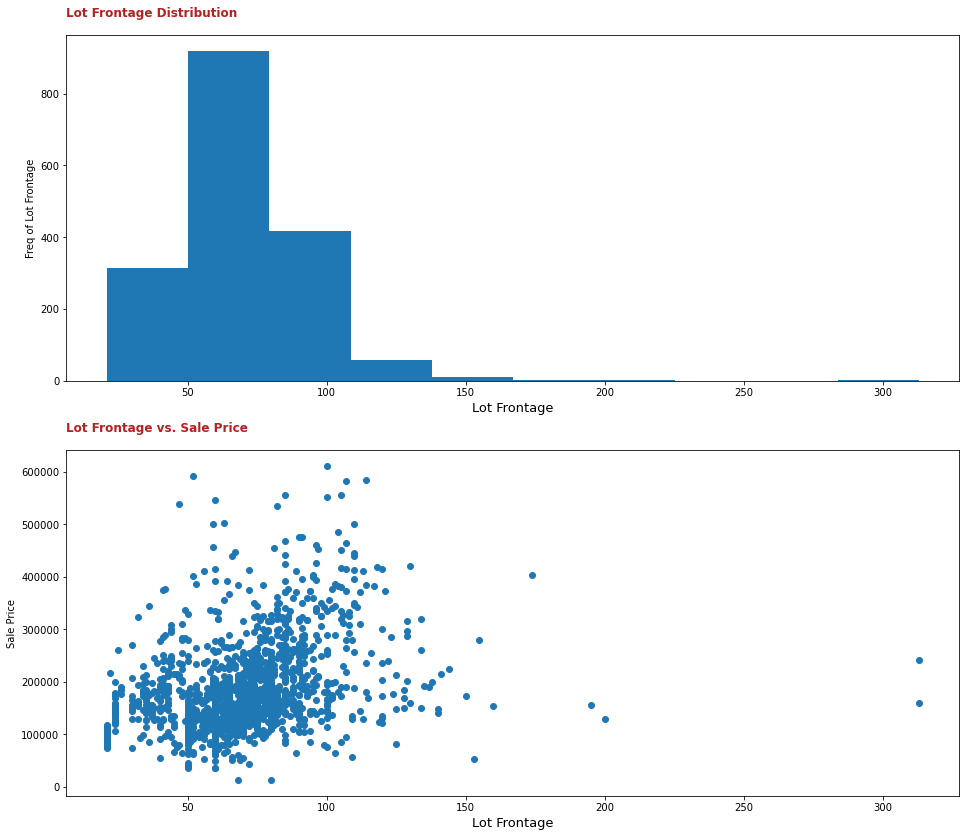

In [112]:
plot_continuous_feature('Lot Frontage')

#### Lot Area

In [91]:
col_info('Lot Area', 'Continuous')

,type,nulls,dtype,nunique,unique_values,value_counts
Lot Area,Continuous,0,int64,1476,"[13517, 11492, 7922, 9802, 14235, 16492, 3675,...",9600 34 7200 27 6000 26 10800 1...


In [92]:
# plot_continuous_feature('Lot Area')

#### Mas Vnr Area

In [93]:
col_info('Mas Vnr Area', 'Continuous')

,type,nulls,dtype,nunique,unique_values,value_counts
Mas Vnr Area,Continuous,22,float64,373,"[289.0, 132.0, 0.0, 82.0, 180.0, 192.0, 232.0,...",0.0 1216 120.0 11 176.0 10 200....


In [94]:
# plot_continuous_feature('Mas Vnr Area')

#### BsmtFin SF 1

In [95]:
col_info('BsmtFin SF 1', 'Continuous')

,type,nulls,dtype,nunique,unique_values,value_counts
BsmtFin SF 1,Continuous,1,float64,821,"[533.0, 637.0, 731.0, 0.0, 247.0, 547.0, 1000....",0.0 657 24.0 17 16.0 10 384....


#### Bsmt Unf SF

In [96]:
col_info('Bsmt Unf SF', 'Continuous')

,type,nulls,dtype,nunique,unique_values,value_counts
Bsmt Unf SF,Continuous,1,float64,967,"[192.0, 276.0, 326.0, 384.0, 676.0, 557.0, 0.0...",0.0 165 384.0 14 672.0 11 728.0 ...


In [97]:
# plot_continuous_feature('Bsmt Unf SF')

#### Total Bsmt SF

In [98]:
col_info('Total Bsmt SF', 'Continuous')

,type,nulls,dtype,nunique,unique_values,value_counts
Total Bsmt SF,Continuous,1,float64,892,"[725.0, 913.0, 1057.0, 384.0, 676.0, 1517.0, 5...",0.0 54 864.0 51 672.0 20 1040.0 ...


In [99]:
# plot_continuous_feature('Total Bsmt SF')

#### 1st Flr SF

In [103]:
cont_vars = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF',  '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

In [104]:
# for i in cont_vars:
#     print(corrco(i))

In [106]:
# for i in cont_vars:
#     plot_continuous_feature(i)

In [ ]:
for i in df.columns.sort_values():
    print(i)

---

In [ ]:
[str(num) for num in df['Lot Shape'].unique()]

In [ ]:
fix, ax = plt.subplots(3, 1, figsize=(16, 20))

ax[0].bar(x = [str(num) for num in sorted(df[feature].unique())], 
          height = df[feature].value_counts(normalize=True).sort_index())
ax[0].set_ylabel('Freq of ' + feature, fontsize=13)
ax[0].set_title('Frequency of Each ' + feature, 
                fontweight='bold', 
                color='firebrick', 
                pad=18, 
                loc='left')

In [ ]:
def plot_nominal_feature(feature):    
    fix, ax = plt.subplots(3, 1, figsize=(16, 20))

    ax[0].bar(x = [str(num) for num in sorted(df[feature].unique())], 
              height = df[feature].value_counts(normalize=True).sort_index())
    ax[0].set_ylabel('Freq of ' + feature, fontsize=13)
    ax[0].set_title('Frequency of Each ' + feature, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')
    
    ax[1].bar(x = [str(num) for num in sorted(df[feature].unique())], 
              height = df.groupby([feature])['SalePrice'].mean())
    ax[1].set_ylabel('Avg Sale Price', fontsize=13)
    ax[1].set_title('Average Sale Price for ' + feature, 
                    fontsize=13, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left')

    df.boxplot(column=['SalePrice'], by=feature, ax=ax[2])
    ax[2].set_ylabel('Sale Price', fontsize=13)
    ax[2].set_title('Sale Price for each ' + feature, 
                    fontsize=13, 
                    fontweight='bold', 
                    color='firebrick', 
                    pad=18, 
                    loc='left');

---
---

In [ ]:
# fix, ax = plt.subplots(3, 1, figsize=(16, 20))

# ax[0].bar(x = [str(num) for num in sorted(df['MS SubClass'].unique())], 
#           height = df['MS SubClass'].value_counts(normalize=True).sort_index())
# ax[0].set_ylabel('Freq of MS SubClass', fontsize=13)
# ax[0].set_title('Frequency of Each MS SubClass', 
#                 fontweight='bold', 
#                 color='firebrick', 
#                 pad=18, 
#                 loc='left')

# ax[1].bar(x = [str(num) for num in sorted(df['MS SubClass'].unique())], 
#           height = df.groupby(['MS SubClass'])['SalePrice'].mean(), 
#           width = 0.5)
# ax[1].set_ylabel('Sale Price', fontsize=13)
# ax[1].set_title('Average Sale Price for Each MS SubClass', 
#                 fontsize=13, 
#                 fontweight='bold', 
#                 color='firebrick', 
#                 pad=18, 
#                 loc='left')

# df.boxplot(column=['SalePrice'], by='MS SubClass', ax=ax[2])
# ax[2].set_ylabel('Sale Price', fontsize=13)
# ax[2].set_title('Sale Price for each MS SubClass', 
#                 fontsize=13, 
#                 fontweight='bold', 
#                 color='firebrick', 
#                 pad=18, 
#                 loc='left');

---

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import linear_model, datasets

Seaborn Joint Plot

In [ ]:
sns.jointplot(x=df['MS SubClass'], 
              y=df['SalePrice']);

Fitting linear Regression Models predicting `Price` target vector from feature

In [ ]:
np.array(df['SalePrice'])

In [ ]:
# 1. Data 
X = df[['MS SubClass']]
y = df['SalePrice']

# 2. Instance of Model 
lm = linear_model.LinearRegression()

# 3. train/fit model to data 
lm.fit(X, y)

## Dummy Submission Test

In [ ]:
test_df = pd.read_csv('datasets/test.csv')

In [ ]:
submission_df = pd.DataFrame()

Lucas said he would delete ```house['Id']```

In [ ]:
submission_df['Id'] = test_df['PID']

In [ ]:
submission_df['SalePrice'] = house['SalePrice'].mean()

In [ ]:
# Always check shape is still correct after adding to df

# print(submission_df.shape)
# submission_df.head()

In [ ]:
submission_df.to_csv('datasets/dummy_submission.csv', index=False)

# Joint Plots